# sequential api

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model_seq1 = keras.Sequential([
    layers.Dense(30, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

model_seq2 = keras.Sequential()
model_seq2.add(layers.Dense(10, activation = 'softmax'))


In [5]:
model_seq1.build(input_shape=(None,3))
model_seq1.weights


[<tf.Variable 'dense_3/kernel:0' shape=(3, 30) dtype=float32, numpy=
 array([[-0.1605035 ,  0.27830476,  0.15772212, -0.4206799 ,  0.24517667,
         -0.09325305, -0.17684525,  0.41972333,  0.39067262,  0.04795581,
         -0.2859764 , -0.31173602, -0.31357682,  0.02968591,  0.06046522,
          0.00827652, -0.01490405, -0.29353017, -0.11058918, -0.00673145,
          0.05715144, -0.24926695, -0.27098763,  0.4254099 , -0.11128575,
         -0.10295162,  0.23222816,  0.15531027, -0.08585307,  0.24225682],
        [ 0.15248245,  0.19952089,  0.04438362, -0.3330322 ,  0.12689555,
          0.41708708,  0.27320856,  0.17457181,  0.39046645, -0.4068089 ,
          0.37181073,  0.12905163, -0.15637347, -0.4254501 ,  0.35921687,
         -0.10039145,  0.23235494,  0.35403425,  0.06405684,  0.2501629 ,
         -0.06056923, -0.26335436,  0.20915037, -0.07025385,  0.27063793,
         -0.2548421 ,  0.1242668 , -0.2858234 , -0.04399413,  0.09021699],
        [ 0.26958382, -0.07422346, -0.201

In [6]:
model_seq1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                120       
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
Total params: 430
Trainable params: 430
Non-trainable params: 0
_________________________________________________________________


In [8]:
# build 하지 않고도 weight 생성하려면 input 클래스 객체를 layer에 추가해주면된다. 이 때 input shape은 배치 크가가아닌 샘플의 크기

model_seq3 = keras.Sequential()
model_seq3.add(keras.Input(shape = (3,)))
model_seq3.add(layers.Dense(10, activation = 'softmax'))
model_seq3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                40        
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


# functional api

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

# 다중 입력 , 다중 출력
input_shape1 = 100
input_shape2 = 300

input1 = keras.Input(shape = input_shape1,)
input2 = keras.Input(shape = input_shape2,)

total_input = keras.layers.Concatenate()([input1, input2])
x = keras.layers.Dense(64, activation = 'relu')(total_input)

output1 = keras.layers.Dense(1, activation = 'sigmoid')(x)
output2 = keras.layers.Dense(10, activation = 'softmax')(x)

model_func1 = keras.Model(inputs = [input1, input2], outputs = [output1, output2])

model_func1.summary()


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 400)          0           ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 dense (Dense)   

2024-06-11 15:42:42.403004: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-11 15:42:42.403098: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
# 모델 중간층의 출력을 새로운 입력으로 추가할수있다. -> 툭성 추출

x = model_func1.layers[3].output
output3 = layers.Dense(5, activation = 'softmax')(x)
model_func2 = keras.Model(inputs = [input1, input2], outputs = [output1, output2, output3])

In [14]:
model_func2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 400)          0           ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 64)           25664       ['concatenate[0][0]']      

# subclassing api

- __init__() 메서드에서 사용할 층 정의
- call() 메서드에서 위의 층을 사용하여 forward pass
- 서브클래스 객체 만들고 데이터와 함께 호출하여 모델 가중치 만든다.


In [21]:
class model_subclass(keras.Model):
    def __init__(self):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.dense1 = layers.Dense(64, activation = 'softmax')
        self.dense2 = layers.Dense(1, activation = 'sigmoid')
    
    def call(self, inputs):
        input1 = inputs[0]
        input2 = inputs[1]
        x = self.concat_layer([input1, input2])
        output1 = self.dense1(x)
        output2 = self.dense2(x)

        return output1, output2

model_sub1 = model_subclass()





# 방식 혼합하기 -> 중요!

In [23]:
class class_func(keras.Model):
    def __init__(self):
        super().__init__()
        self.denselayer = layers.Dense(10, activation = 'softmax')
        self.denselayer2 = layers.Dense(1, activation = 'sigmoid')

    def call(self, inputs):
        output1 = self.denselayer(inputs)
    
        return output1

inputs = keras.Input(shape=(64,))
x = layers.Dense(64, activation = 'relu')(inputs)
output = class_func()(x)
model_mix1 = keras.Model(inputs = inputs, outputs = output)

model_mix1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                                 
 class_func_1 (class_func)   (None, 10)                650       
                                                                 
Total params: 4,810
Trainable params: 4,810
Non-trainable params: 0
_________________________________________________________________


In [27]:
inputs = keras.Input(shape=(64,))
x = layers.Dense(10, activation = 'softmax')(inputs)
model_mix = keras.Model(inputs = inputs, outputs = x)

class func_class(keras.Model):
    def __init__(self):
        super().__init__()
        self.dense = layers.Dense(64, activation = 'relu')
        self.classifier = model_mix

    def call(self, inputs):
        x = self.dense(inputs)
        return self.classifier(x)

model_mix2 = func_class()

In [30]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28*28)).astype('float32') / 255
x_test = x_test.reshape((10000, 28*28)).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train, x_val = x_train[10000:], x_train[:10000]
y_train, y_val = y_train[10000:], y_train[:10000]

model_mix2.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history = model_mix2.fit(x_train, y_train, epochs = 5, validation_data = (x_val, y_val))


Epoch 1/5


2024-06-11 16:56:30.125013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1562/1563 [============================>.] - ETA: 0s - loss: 0.3234 - accuracy: 0.9101

2024-06-11 16:56:45.149851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 18s 11ms/step - loss: 0.3233 - accuracy: 0.9101 - val_loss: 0.1824 - val_accuracy: 0.9493
Epoch 2/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.1561 - accuracy: 0.9553 - val_loss: 0.1376 - val_accuracy: 0.9582
Epoch 3/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.1163 - accuracy: 0.9666 - val_loss: 0.1282 - val_accuracy: 0.9621
Epoch 4/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0913 - accuracy: 0.9729 - val_loss: 0.1067 - val_accuracy: 0.9688
Epoch 5/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0745 - accuracy: 0.9767 - val_loss: 0.0976 - val_accuracy: 0.9709


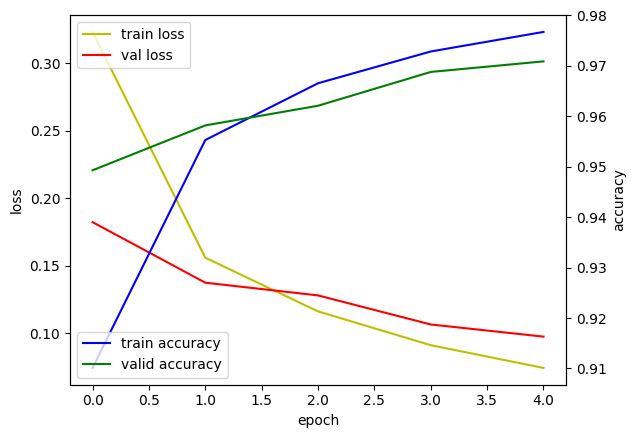

In [31]:
import matplotlib.pyplot as plt
import numpy as np


fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label = 'train loss')
loss_ax.plot(history.history['val_loss'], 'r', label = 'val loss')

acc_ax.plot(history.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'g', label = 'valid accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [32]:
test_metric = model_mix2.evaluate(x_test, y_test)


313/313 [==============================] - 3s 9ms/step - loss: 0.0930 - accuracy: 0.9711


In [35]:
predictions = model_mix2.predict(x_test)

print(predictions.shape)

313/313 [==============================] - 0s 1ms/step
(10000, 10)
